# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
page_html = browser.html
page_soup = soup(page_html, 'html.parser')
table = page_soup.find('table')

In [5]:
# Extract all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    columns = row.find_all('td')
    row_data = [column.get_text(strip=True) for column in columns]
    data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = [
    "id",
    "terrestrial_date",
    "sol",
    "ls",
    "month",
    "min_temp",
    "pressure"
]
df = pd.DataFrame(data, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
display(df)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


# Examine data type of each column
print(df.dtypes)

In [9]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [10]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [11]:
# 1. How many months are there on Mars?
unique_month_count = df['month'].nunique()
unique_month_count

12

In [12]:
# 2. How many Martian days' worth of data are there?
martian_days_count = df['sol'].nunique()
martian_days_count

1867

In [13]:
# 3. What is the average low temperature by month?
df['min_temp'] = df['min_temp'].astype(float)
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()
average_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

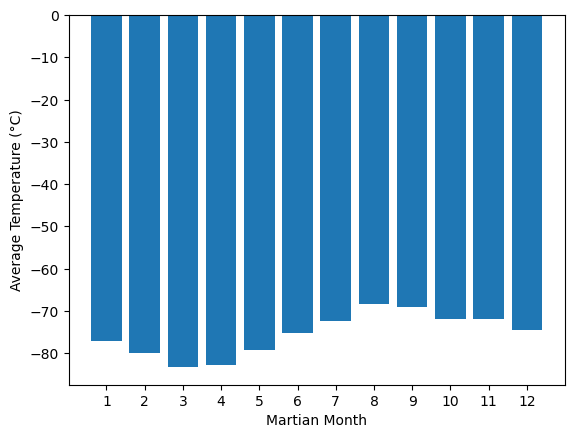

In [14]:
# Plot the average temperature by month
average_temp_by_month = df.groupby('month')['min_temp'].mean()
plt.bar(average_temp_by_month.index, average_temp_by_month)
plt.xlabel("Martian Month")
plt.ylabel("Average Temperature (°C)")
plt.xticks(average_temp_by_month.index)  
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location

# Filter data for Curiosity location
curiosity_data = df[df['id'] == 'Curiosity'] # I know the ID is a number, but I didnt get how I coudl filter only fro curiosity

# Calculate the average minimum temperature for each month
average_min_temp_by_month = curiosity_data.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_min_temp_by_month.min()
hottest_month = average_min_temp_by_month.max()

print("Coldest month at Curiosity's location:", coldest_month)
print("Hottest month at Curiosity's location:", hottest_month)


Coldest month at Curiosity's location: nan
Hottest month at Curiosity's location: nan


In [18]:
# 4. Average pressure by Martian month
df['pressure'] = df['pressure'].astype(float)
average_pressure_by_month = df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

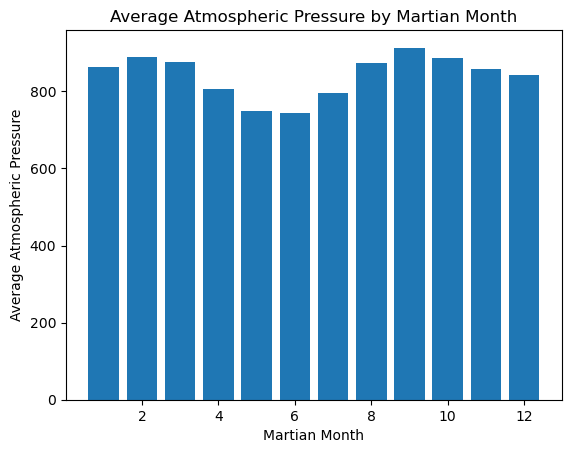

In [19]:
# Plot the average pressure by month
plt.bar(average_pressure_by_month.index, average_pressure_by_month)
plt.xlabel("Martian Month")
plt.ylabel("Average Atmospheric Pressure")
plt.title("Average Atmospheric Pressure by Martian Month")
plt.show()

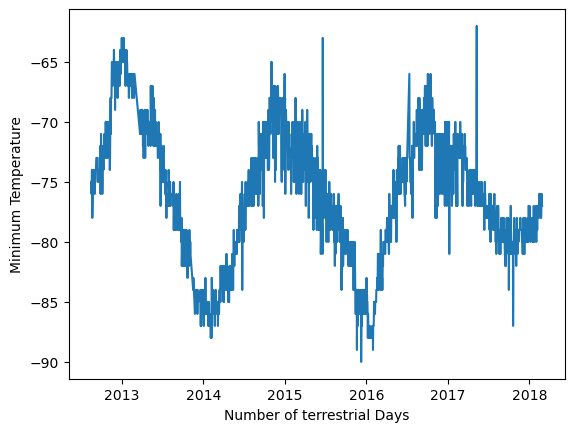

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
sols_in_martian_year = df['sol'].max() - df['sol'].min()

earth_days_in_martian_year = sols_in_martian_year * (687 / df['terrestrial_date'].nunique())

# Create a line chart to show the relationship between Earth days and minimum temperature
plt.plot(df['terrestrial_date'],df['min_temp'])
plt.xlabel("Number of terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show()

# I tried to get the days and ot the year but I wasn't able, I hope it still answer the question (without the format)


## Which month, on average, has the lowest temperature? The highest? (10 points): 


In [21]:
# Calculate average minimum temperature by month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Identify the month with the lowest and highest average minimum temperature
lowest_temp_month = average_min_temp_by_month.idxmin()
highest_temp_month = average_min_temp_by_month.idxmax()

print("Month with the lowest average minimum temperature:", lowest_temp_month)
print("Month with the highest average minimum temperature:", highest_temp_month)


Month with the lowest average minimum temperature: 3
Month with the highest average minimum temperature: 8


## Which month, on average, has the lowest atmospheric pressure? The highest? (10 points)


In [22]:
# Calculate average atmospheric pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Identify the month with the lowest and highest average atmospheric pressure
lowest_pressure_month = average_pressure_by_month.idxmin()
highest_pressure_month = average_pressure_by_month.idxmax()

print("Month with the lowest average atmospheric pressure:", lowest_pressure_month)
print("Month with the highest average atmospheric pressure:", highest_pressure_month)


Month with the lowest average atmospheric pressure: 6
Month with the highest average atmospheric pressure: 9


## How many terrestrial days exist in a Martian year? A visual estimate within 25% was made. (10 points)

From a google search: 687 Earth days. link: https://solarsystem.nasa.gov/planets/mars/overview/#:~:text=Longer%20Days,time%20in%20687%20Earth%20days. # Since I was only able to get the year I wasn't able to make a visual verification, so I went to the NASA source, please see above link. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [ ]:
browser.quit()